In [136]:
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from function.generate_data import datos_xor
from modelo.nlp import PerceptronMultilayer
from function.act_functions import tanh

#Semilla aleatoria
random.seed(42)


In [137]:
from function.generate_data import datos_linealmente_seprables

# Datos de entrada y salida
X, y = datos_xor(100,2)

# Sepracion del conjunto de entrada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)


In [138]:
# Se crea el modelo 
# Y se entrena el modelo

funcion_activacion = tanh
capas =[2,4,1]

model = PerceptronMultilayer(capas, tanh)

model.train(X_train,y_train, epochs=1000, learning_rate=0.0001)


Epoca 0: Error = 0.5593354269483717
Epoca 20: Error = 0.5549166390534467
Epoca 40: Error = 0.5447996026460795
Epoca 60: Error = 0.5230892348361129
Epoca 80: Error = 0.4818619426422061
Epoca 100: Error = 0.4186930255548091
Epoca 120: Error = 0.3483561436390968
Epoca 140: Error = 0.2945494742519039
Epoca 160: Error = 0.26529297718568123
Epoca 180: Error = 0.25286880657732236
Epoca 200: Error = 0.24833609305146256
Epoca 220: Error = 0.24681577073210978
Epoca 240: Error = 0.24632676400563497
Epoca 260: Error = 0.2461718260286979
Epoca 280: Error = 0.24612247538417134
Epoca 300: Error = 0.24610635619429502
Epoca 320: Error = 0.24610083283234263
Epoca 340: Error = 0.24609879629863166
Epoca 360: Error = 0.24609796962080424
Epoca 380: Error = 0.24609759516474072
Epoca 400: Error = 0.24609740540501876
Epoca 420: Error = 0.2460972981028516
Epoca 440: Error = 0.24609723054521027
Epoca 460: Error = 0.24609718331975208
Epoca 480: Error = 0.24609714698749216
Epoca 500: Error = 0.24609711673614726
Ep

In [139]:
# Se crea un prediccion sobre el conjunto de TEST
y_pred = model.predict(X_test)

# Metricas del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisión:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Puntaje F1:", f1)


Precisión: 0.7
Precisión: 0.7
Recall: 1.0
Puntaje F1: 0.8235294117647058


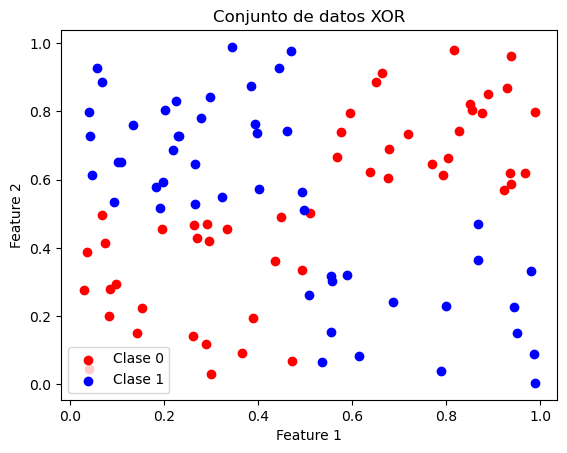

In [140]:
# Conjunto de datos
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Conjunto de datos XOR')
plt.legend()
plt.show()

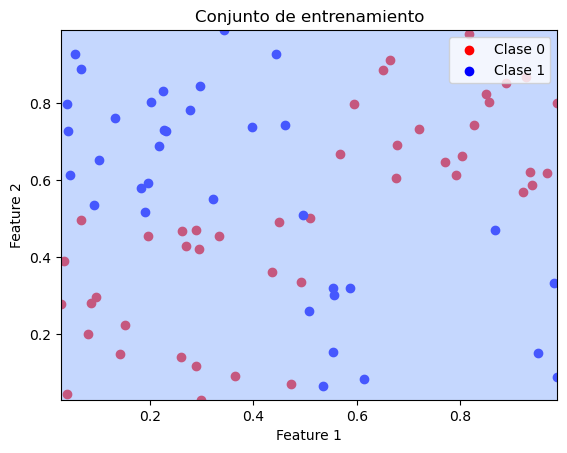

In [141]:

import matplotlib.pyplot as plt


# Definir los valores mínimo y máximo para cada característica
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()

# Crear una cuadrícula que representa todas las combinaciones posibles de valores de características
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predecir la clase para cada punto en la rejilla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Visualizar la curva de separación
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Clase 1')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0.2, 0.5, 0.8], colors='black', linewidths=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Conjunto de entrenamiento')
plt.show()

